In [68]:
# 导包
import re
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 加载数据
df = pd.read_csv('./招聘数据.csv')

# 数据预览
print(df.head())

# 数据预处理

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 忽略未来版本警告
warnings.filterwarnings('ignore')

# 提取城市
df['城市'] = df['岗位位置'].str.extract(r'(\w+)')
# print(df['城市'])

# 处理薪资范围，转为月均值（单位k）
def parse_salary(s):
    match = re.findall(r'(\d+)[kK]', s)
    if len(match) == 2:
        return (int(match[0]) + int(match[1])) / 2
    elif len(match) == 1:
        return int(match[0])
    else:
        return None
        
df['平均薪资(k)'] = df['薪资范围'].apply(parse_salary)

  编号                  岗位名     岗位位置     薪资范围    经验要求 学历要求  \
0  1           Python在线兼职   北京·海淀区    2k-3k    经验不限   本科   
1  2           Python在线兼职    杭州·长河    2k-3k    经验不限   本科   
2  3  实习c++python算法工程师工业软  天津·滨海新区    1k-2k    经验不限   本科   
3  4        python工程师（兼职）   深圳·南山区    2k-4k    经验不限   硕士   
4  5        python后端开发工程师   上海·长宁区  10k-15k  经验1-3年   本科   

                       公司名                主要业务   融资情况    人员规模  \
0                       明冬               教育｜培训    未融资   少于15人   
1                       明冬               教育｜培训    未融资   少于15人   
2                    长数机器人  人工智能服务,软件服务｜咨询,制造业    天使轮   少于15人   
3                    美译通翻译             专业服务｜咨询  不需要融资  15-50人   
4  戎磐网络该企业已上传营业执照并通过资质验证审核                信息安全     B轮  15-50人   

                   岗位描述  
0           “在线兼职，不用坐班”  
1                “不用坐班”  
2           “985硕博科创团队”  
3           “工作时间弹性，自由”  
4  “季度奖金，技能分享，其他城市发展机会”  


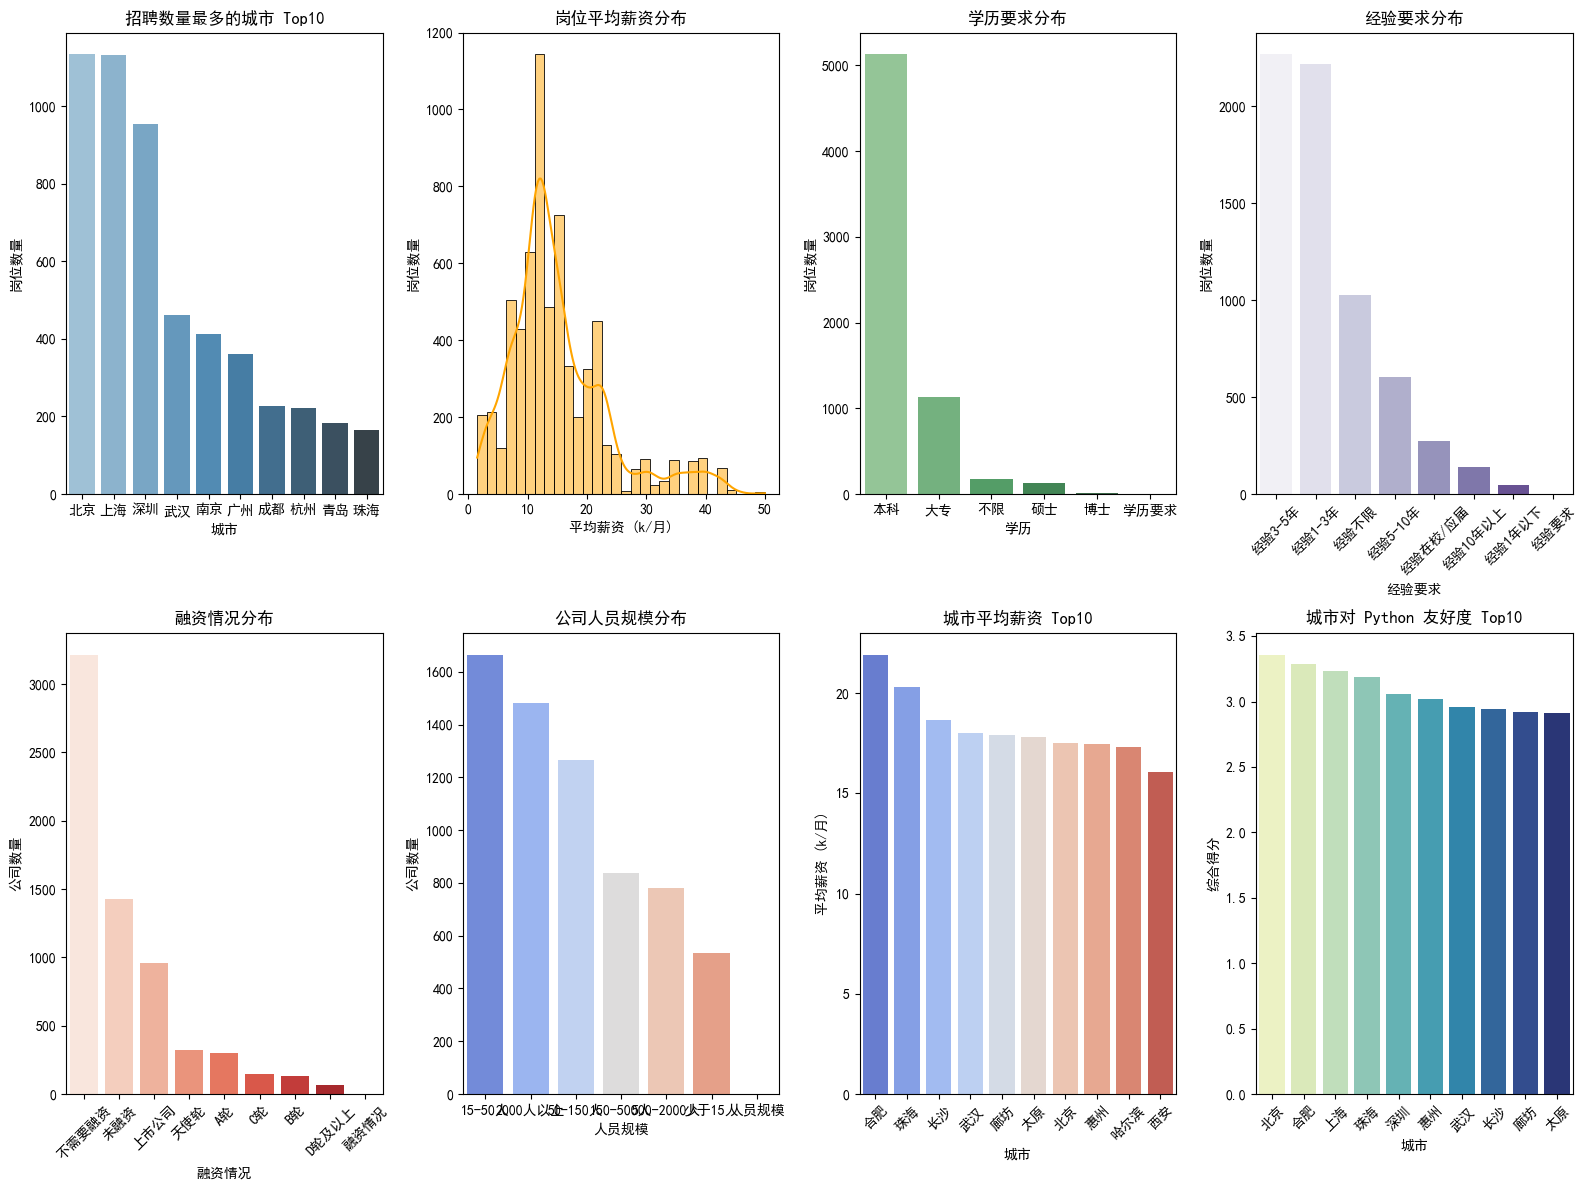

In [71]:
# 创建一个 2x4 的子图
fig, axes = plt.subplots(2, 4, figsize=(16, 12))

# 1 城市招聘数量 Top10
top_cities = df['城市'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Blues_d', ax=axes[0, 0])
axes[0, 0].set_title('招聘数量最多的城市 Top10')
axes[0, 0].set_ylabel('岗位数量')
axes[0, 0].set_xlabel('城市')

# 2 平均薪资分布
sns.histplot(df['平均薪资(k)'].dropna(), bins=30, kde=True, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('岗位平均薪资分布')
axes[0, 1].set_xlabel('平均薪资 (k/月)')
axes[0, 1].set_ylabel('岗位数量')

# 3 学历要求分布
edu_counts = df['学历要求'].value_counts()
sns.barplot(x=edu_counts.index, y=edu_counts.values, palette='Greens_d', ax=axes[0, 2])
axes[0, 2].set_title('学历要求分布')
axes[0, 2].set_ylabel('岗位数量')
axes[0, 2].set_xlabel('学历')

# 4 经验要求分布
exp_counts = df['经验要求'].value_counts()
sns.barplot(x=exp_counts.index, y=exp_counts.values, palette='Purples', ax=axes[0, 3])
axes[0, 3].set_title('经验要求分布')
axes[0, 3].set_ylabel('岗位数量')
axes[0, 3].set_xlabel('经验要求')
axes[0, 3].tick_params(axis='x', rotation=45)  # 旋转横坐标标签，避免重叠

# 5 融资情况分布
fin_counts = df['融资情况'].value_counts().head(10)
sns.barplot(x=fin_counts.index, y=fin_counts.values, palette='Reds', ax=axes[1, 0])
axes[1, 0].set_title('融资情况分布')
axes[1, 0].set_ylabel('公司数量')
axes[1, 0].set_xlabel('融资情况')
axes[1, 0].tick_params(axis='x', rotation=45)  # 旋转横坐标标签，避免重叠

# 6 公司人员规模分布
size_counts = df['人员规模'].value_counts().head(10)
sns.barplot(x=size_counts.index, y=size_counts.values, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('公司人员规模分布')
axes[1, 1].set_ylabel('公司数量')
axes[1, 1].set_xlabel('人员规模')

# 7 城市平均薪资 Top10
city_avg_salary = df.groupby('城市')['平均薪资(k)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_avg_salary.index, y=city_avg_salary.values, palette='coolwarm', ax=axes[1, 2])
axes[1, 2].set_title('城市平均薪资 Top10')
axes[1, 2].set_xlabel('城市')
axes[1, 2].set_ylabel('平均薪资 (k/月)')
axes[1, 2].tick_params(axis='x', rotation=45)  # 旋转横坐标标签，避免重叠

# 8 城市综合评分（对Python岗位最友好）
# 经验要求评分
def experience_score(exp):
    if '经验不限' in exp:
        return 1
    elif '1-3年' in exp:
        return 0.8
    elif '3-5年' in exp:
        return 0.6
    elif '5年以上' in exp:
        return 0.4
    else:
        return 0
df['经验要求评分'] = df['经验要求'].apply(experience_score)
# 学历要求评分
def education_score(edu):
    if '本科' in edu:
        return 1
    elif '硕士' in edu:
        return 0.8
    elif '博士' in edu:
        return 0.6
    else:
        return 0
df['学历要求评分'] = df['学历要求'].apply(education_score)
# 公司规模评分
def company_size_score(size):
    if '少于15人' in size:
        return 0.6
    elif '15-50人' in size:
        return 0.8
    elif '50-150人' in size:
        return 1
    elif '150人以上' in size:
        return 0.7
    else:
        return 0
df['公司规模评分'] = df['人员规模'].apply(company_size_score)
# 按城市统计每个城市的相关数据
city_stats = df.groupby('城市').agg(
    岗位数量=('岗位名', 'count'),
    平均薪资=('平均薪资(k)', 'mean'),
    经验要求评分=('经验要求评分', 'mean'),
    学历要求评分=('学历要求评分', 'mean'),
    公司规模评分=('公司规模评分', 'mean')
).reset_index()
# 归一化数据
scaler = MinMaxScaler()
columns_to_normalize = ['岗位数量', '平均薪资', '经验要求评分', '学历要求评分', '公司规模评分']
city_stats[columns_to_normalize] = scaler.fit_transform(city_stats[columns_to_normalize])
# 假设各个维度的权重均等（α = β = γ = δ = 1），可根据需求调整权重
weights = {
    '岗位数量': 1,
    '平均薪资': 1,
    '经验要求评分': 1,
    '学历要求评分': 1,
    '公司规模评分': 1
}
# 计算综合得分
city_stats['综合得分'] = (weights['岗位数量'] * city_stats['岗位数量'] +
                          weights['平均薪资'] * city_stats['平均薪资'] +
                          weights['经验要求评分'] * city_stats['经验要求评分'] +
                          weights['学历要求评分'] * city_stats['学历要求评分'] +
                          weights['公司规模评分'] * city_stats['公司规模评分'])
# 按综合得分排序，得到对 Python 岗位最友好的城市
city_stats_sorted = city_stats.sort_values(by='综合得分', ascending=False)
# 输出排名前几的城市
# print(city_stats_sorted.head())
top_friendly = city_stats_sorted.head(10)
sns.barplot(x=top_friendly['城市'], y=top_friendly['综合得分'], palette='YlGnBu', ax=axes[1, 3])
axes[1, 3].set_title('城市对 Python 友好度 Top10')
axes[1, 3].set_ylabel('综合得分')
axes[1, 3].set_xlabel('城市')
axes[1, 3].tick_params(axis='x', rotation=45)

# 调整布局，确保图表不重叠
plt.tight_layout()

# 显示所有图表
plt.show()